In-hospital_death
0    63.327336
1    69.971119
Name: Age, dtype: float64


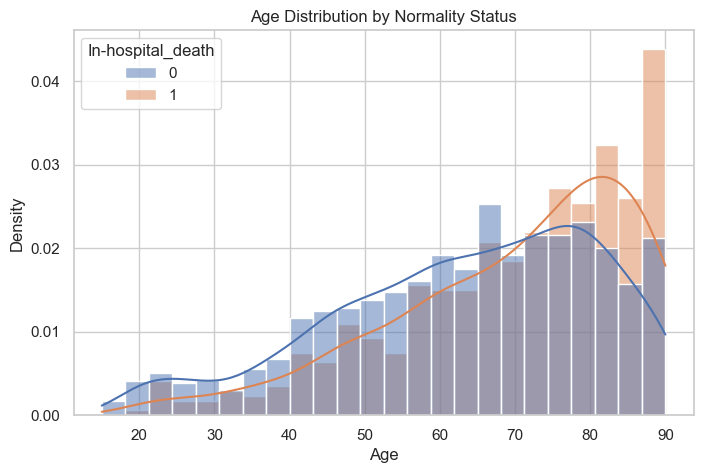

In-hospital_death
0    119.056707
1    115.871589
Name: SysABP, dtype: float64


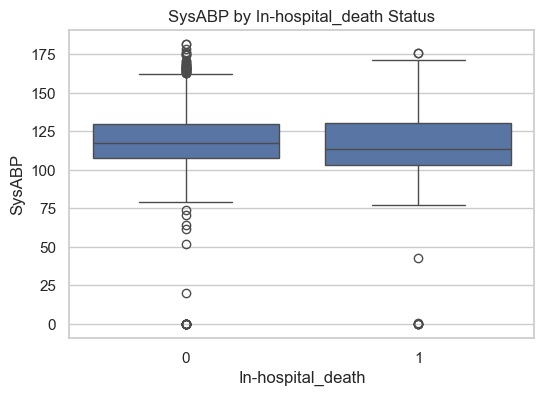

In-hospital_death
0    11.938905
1     9.539199
Name: GCS, dtype: float64


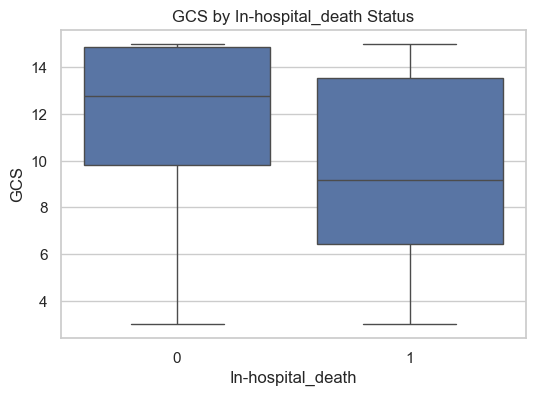

Accuracy: 0.86
ROC AUC Score: 0.7047555538121576


/Users/haileytzou/Downloads/ICU-analysis-project/.venv/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
import pandas as pd

df = pd.read_csv("../data/icu_mortality_train.csv")
df.head() 
df.shape
df.columns
df['In-hospital_death'].value_counts()
df['In-hospital_death'].value_counts(normalize=True)

missing = df.isnull().sum().sort_values(ascending = False)
missing.head(15)

df.describe().T

target = 'In-hospital_death'
group_means = df.groupby(target).mean()
group_means.head(15)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize = (8, 5))
sns.histplot(data=df, x='Age', hue='In-hospital_death', kde=True, stat='density', common_norm=False)
plt.title('Age Distribution by Normality Status')
print(df.groupby('In-hospital_death')['Age'].mean())
plt.show()

plt.figure(figsize = (6, 4))
sns.boxplot(x='In-hospital_death', y='SysABP', data=df)
plt.title('SysABP by In-hospital_death Status')
print(df.groupby('In-hospital_death')['SysABP'].mean())
plt.show()

plt.figure(figsize = (6, 4))
sns.boxplot(x='In-hospital_death', y='GCS', data=df)
plt.title('GCS by In-hospital_death Status')
print(df.groupby('In-hospital_death')['GCS'].mean())
plt.show()

X = df.drop(columns=['In-hospital_death', 'RecordID'])
y = df['In-hospital_death']
X = X.fillna(X.median())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
y_proba = model.predict_proba(X_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


